<font size="5"> <a href="https://uspdigital.usp.br/jupiterweb/obterDisciplina?sgldis=MAC0209"> MAC0209 - Modelagem e Simulação</a> </font>

Roberto M. Cesar Jr. (IME-USP)

Roberto Hirata Jr. (IME-USP)
***
<font size="5"> Resoluções de EDOs: soluções analítica e numérica pelo método de Euler </font>
***

# Método de Euler para solução de EDOs

O método de Euler é uma forma de resolver numericamente uma equação diferencial ordinária. Assume-se ser conhecidas a derivada de uma função que se quer encontrar ("resolver") e um valor inicial da equação a ser integrada. Por exemplo, no caso do movimento uniformemente acelerado:$$a=\mbox{constante}, b=\mbox{constante}$$

$$v(t) = x'(t) = \frac{dx(t)}{dt} = 2at + b$$, $$x(0)=0$$

A ideia do método de Euler é substituir a derivada por uma aproximação de Taylor, desprezando-se os termos maiores que segunda ordem. Isto é:

$$x'(t)\sim \frac{x(t+\Delta t)-x(t)}{\Delta t}$$

Se denotarmos os valores de $x(t)$ por $x_t$, isto é, ao invés da notação de função, usarmos a notação com índices, e assumirmos que os valores de $t$ só podem ser números inteiros (portanto $\Delta t$ é no mínimo 1, o valor $x(t+\Delta t)$ pode ser escrito como $x_1$, para $t=0$; $x_2$, para $t=1$ e assim por diante. 

Desta maneira, o exemplo poderia ser escrito assim (note que já estamos assumindo $\Delta t = 1$:

$$v(t) = x'(t) = 2*a*t + b \sim x_t - x_{t-1},$$

isto é,

$$ x_t = x_{t-1} + 2*a*t + b $$

Como sabemos o valor inicial em $t=0$, podemos calcular $x_t$ para todo $t>0$:

$$ x_1 = x_{0} + 2*a*1 + b $$

$$ x_2 = x_{1} + 2*a*2 + b = 6*a + 2*b$$

$$ x_3 = x_{2} + 2*a*3 + b = 6*a + 2*b + 6*a + b = 12*a + 3*b$$

e assim por diante.

Em verdade, $\Delta t$ não precisa ser um número inteiro e em geral, não é. Porém, no caso de não ser um número inteiro, desacoplamos os índices do incremento pois os índices são inteiros. 



# Implementanto o método de Euler

Da forma que a equação foi construída, isto é, $ x_t = x_{t-1} + 2*a*t + b $, é trivial implementá-la. basta que estabeleçamos os valores de $a$, $b$ e $x_0$.

No entanto, para a implementação ficar organizada, crie duas funções: 
- nextXeuler(x,t,params,dt): que recebe um vetor de parâmetros iniciais, params, o tempo e a posição atual, t e x, respectivamente, e o delta de tempo, dt (note que com isso desacoplamos os índices do incremento). A função retorna a nova posição $x_t$ de acordo com o método de Euler: $ x_t = x_{t-1} + 2*a*t + b $ .
- nextXa(t,params): que recebe um vetor de parâmetros iniciais, params, e o tempo atual. A função retorna a nova posição $x_t$ de acordo com a equação integrada analiticamente: $ x_t = a*t^2 + b*t + x_0 $.

Crie uma função main que itera essas duas funções entre os tempos 0s e 2s (com um dt de 0.1s) calcula e imprime a diferença entre elas (erro) e as grafique.


In [62]:
# todos os imports necessários
import matplotlib.pyplot as pyplot
import math

Erro:  0
Erro:  0.009999999999999995
Erro:  0.01999999999999999
Erro:  0.02999999999999997
Erro:  0.039999999999999925
Erro:  0.04999999999999993
Erro:  0.06000000000000005
Erro:  0.07000000000000006
Erro:  0.08000000000000007
Erro:  0.0900000000000003
Erro:  0.10000000000000053
Erro:  0.11000000000000076
Erro:  0.12000000000000055
Erro:  0.13000000000000034
Erro:  0.14000000000000012
Erro:  0.1499999999999999
Erro:  0.15999999999999925
Erro:  0.16999999999999815
Erro:  0.17999999999999794
Erro:  0.18999999999999684


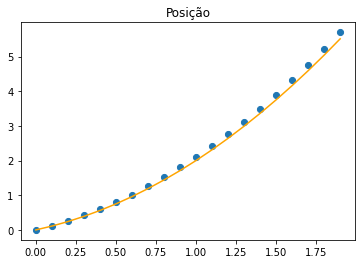

In [143]:
# Implementa o exercício da integração de Euler de dx(t)/dt = 2at + b
def nextXeuler(x,t,params,dt):
    a = params[0]
    b = params[1]
    return x + 2*a*t*dt + b*dt
   
def nextXa(t,params):
    a = params[0]
    b = params[1]
    x0 = params[2]
    return a*(t**2) + b*t + x0

def main():
    t0 = 0
    tf = 2
    dt = 0.1
    x_euler = []
    x_analitico = []
    tempos = []
    params = [1, 1, 0]
    
    while t0 <= tf:
        if t0 == 0:
            x_euler.append(0)
        else:
            x_euler.append(nextXeuler(x_euler[-1], t0, params, dt))
        x_analitico.append(nextXa(t0, params))
        tempos.append(t0)
        t0 += dt
        
    for i in range(len(x_euler)):
        print(f'Erro:  {abs(x_euler[i] - x_analitico[i])}')
    
    
    # imprime o mapa
    pyplot.title("Posição");
    pyplot.plot(tempos, x_analitico, color='orange');
    pyplot.scatter(tempos, x_euler, s=150, marker='.');
    pyplot.show();

main()

## Resolva usando o método de Euler: $\frac{d^2x}{dt^2} = 6t$. Assuma $x(t_0) = 0$ e $v(t_0) = 0$

Escreva a solução para a EDO:

$ \frac{d^2x}{dt^2} = 6t$

Aplicando o raciocínio dos slides apresentados na sala:

$\frac{dv}{dt} = 6t$

$\frac{dx}{dt} = v(t)$


Erro 0
Erro 0.005000000000000002
Erro 0.016000000000000007
Erro 0.033
Erro 0.05600000000000001
Erro 0.08500000000000002
Erro 0.12000000000000008
Erro 0.1610000000000002
Erro 0.2080000000000003
Erro 0.26100000000000045
Erro 0.3200000000000006


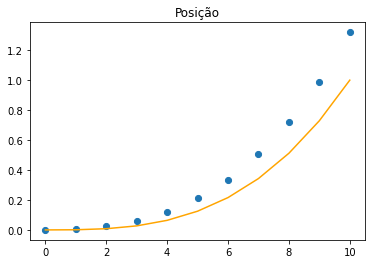

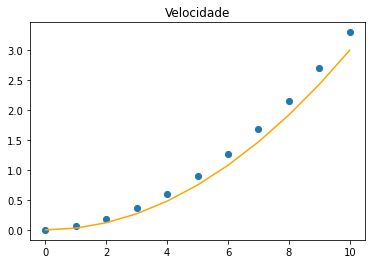

In [146]:
# Implementa o exercício da integração de Euler de d2x / dt2 = 6t
def nextXVeuler(x,t, v, dt):
    vf = 6*t*dt + v
    xf = x + 6*t*dt*dt + v*dt
    return xf, vf

# Resolução analítica
def nextXVa(t):
    vf = 3*t*t # integra a função 6t
    xf =  t*t*t # integra a função 3t^2
    return xf, vf

def main2():
    t0 = 0
    tf = 1
    dt = 0.1
    x_euler = []
    v_euler = []
    x_analitico = []
    v_analitico = []
    tempos = []
    
    while t0 <= tf:
        if t0 == 0:
            x_euler.append(0)
            v_euler.append(0)
            x_analitico.append(0)
            v_analitico.append(0)
        else:
            xe, ve = nextXVeuler(x_euler[-1], t0, v_euler[-1], dt)
            x_euler.append(xe)
            v_euler.append(ve)
            xea, vea = nextXVa(t0)
            x_analitico.append(xea)
            v_analitico.append(vea)
        tempos.append(t0)
        t0 += dt
        
    for i in range(len(x_euler)):
        print(f'Erro {abs(x_euler[i] - x_analitico[i])}')
    
    
    # imprime o mapa
    pyplot.title("Posição");
    pyplot.plot([x*10 for x in tempos], x_analitico, color='orange');
    pyplot.scatter([x*10 for x in tempos], x_euler, s=150, marker='.');
    pyplot.show();
    
    # velocidade
    pyplot.title("Velocidade");
    pyplot.plot([x*10 for x in tempos], v_analitico, color='orange');
    pyplot.scatter([x*10 for x in tempos], v_euler, s=150, marker='.');
    pyplot.show();

main2()

Depois de ter escrito sua solução, compare com a resolução abaixo:


Erro:  0
Erro:  0.005000000000000002
Erro:  0.016000000000000007
Erro:  0.033
Erro:  0.05600000000000001
Erro:  0.08500000000000005
Erro:  0.1200000000000001
Erro:  0.1610000000000002
Erro:  0.2080000000000003
Erro:  0.26100000000000045
Erro:  0.3200000000000006


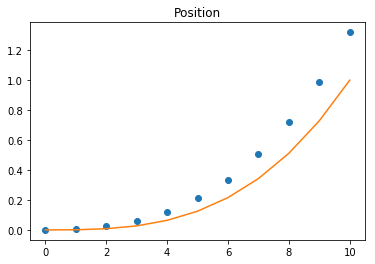

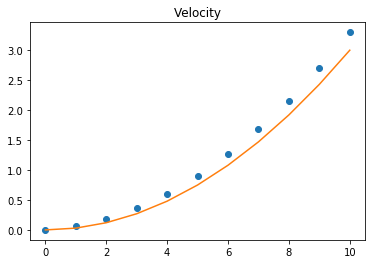

In [ ]:
# d2x / dt2 = 6t

